In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from Definitions import *
from tensorflow.keras.utils import to_categorical
import cv2

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
num_classes = 10  # or whatever number of classes you have
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
], name='model')

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [6]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0532 - accuracy: 0.9189 - val_loss: 0.0251 - val_accuracy: 0.9602
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0207 - accuracy: 0.9677 - val_loss: 0.0183 - val_accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0142 - accuracy: 0.9789 - val_loss: 0.0152 - val_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0110 - accuracy: 0.9836 - val_loss: 0.0143 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - accuracy: 0.9869 - val_loss: 0.0145 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0068 - accuracy: 0.9900 - val_loss: 0.0140 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0055 - accuracy: 0.9926 - val_loss: 0.0154 - val_accuracy:

In [7]:
test_accuracy = test_acc(model, test_images, test_labels)

313/313 [==============================] - 0s 719us/step - loss: 0.0156 - accuracy: 0.9803
Accuracy of the neural network on the 10000 test images: 98.03%


In [8]:
print(test_accuracy)

0.9803000092506409


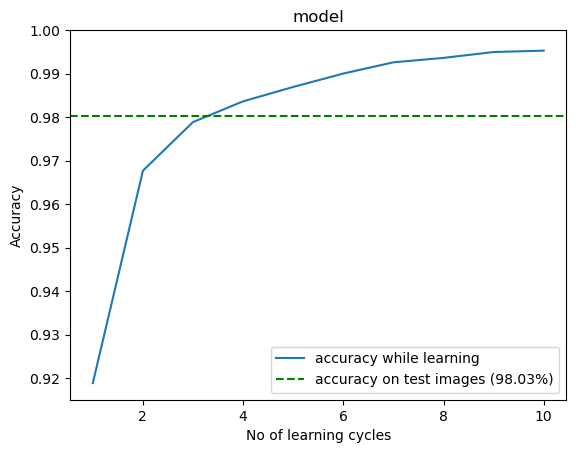

In [9]:
plot_learning_curve(history, test_accuracy, model.name)

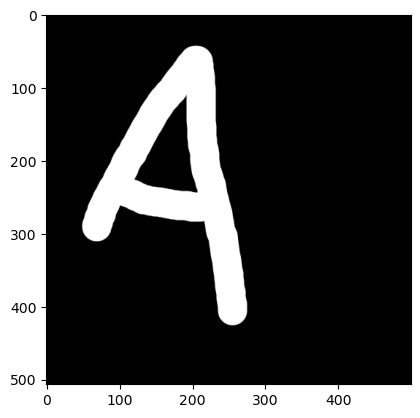

In [55]:
img = cv2.imread("D:/VS CODE PROGRAMS/ML-CODES-VS/Machine Learning/test images/52.jpg", 0) #loading the image itself
img = img.astype(np.float32)/255.0 #normalizing the image
plt.imshow(img, cmap= 'gray')

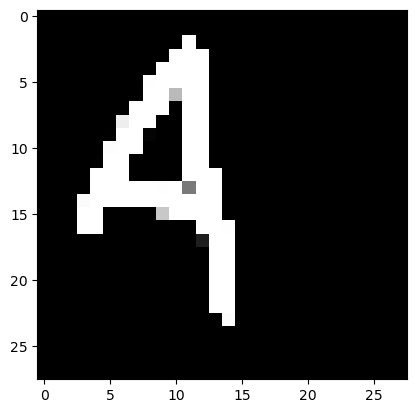

In [56]:
img_resized = cv2.resize(img,(28,28)) #resizing the image to feed into the network
plt.imshow(img_resized, cmap= 'gray')

1/1 [==============================] - 0s 29ms/step


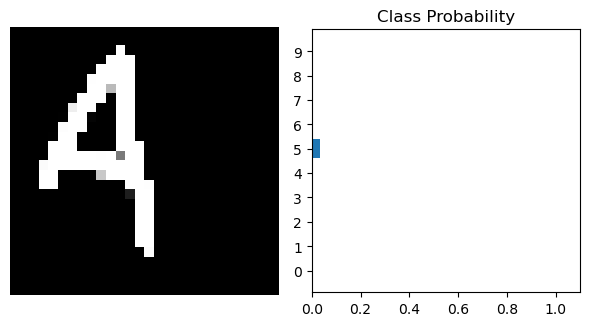

In [57]:
probabilities = model.predict(img_resized.reshape(1,28,28,1))  #predicting (batch_size =1, height = 28, width = 28, channel = 1)
view_classify(img_resized, probabilities[0])